In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from CIDER import response_from_all_injections_and_CO2,AOD_from_injection
from Toolbox import global_mean, lat_band_mean, stack_and_zoh_injections

In [2]:
run load_all_other_variables.py

In [28]:
total_years = 65
no_injection = np.zeros((total_years*12, 7))

no_injection_and_CO2 = np.concatenate((no_injection,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)
SSP245_T = response_from_all_injections_and_CO2(no_injection_and_CO2, param_AOD_all, param_T_all)
# SSP245_T = emulate(param_AOD_all, param_T_all, no_injection, CO2_forcing_SSP245_month, all_T_patterns_scaled, T_base_pattern)

In [41]:
injection_60N = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
injection_30N = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
injection_15N = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
injection_0NS = np.array([2, 4.25, 6.5, 8.75, 11, 13.25, 15.5, 17.75, 19.5, 22, 22, 22, 22])
injection_15S = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
injection_30S = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
injection_60S = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
years_represented_by_array_element = 5
injection_all = stack_and_zoh_injections((injection_60N, injection_30N, injection_15N, injection_0NS, injection_15S, injection_30S, injection_60S),years_represented_by_array_element*12)
all_injection_and_CO2 = np.concatenate((injection_all,CO2_forcing_SSP245_month[0:total_years*12].reshape(total_years*12, 1)),axis=1)

In [42]:
SAI_response = response_from_all_injections_and_CO2(all_injection_and_CO2, param_AOD_all, param_T_all)

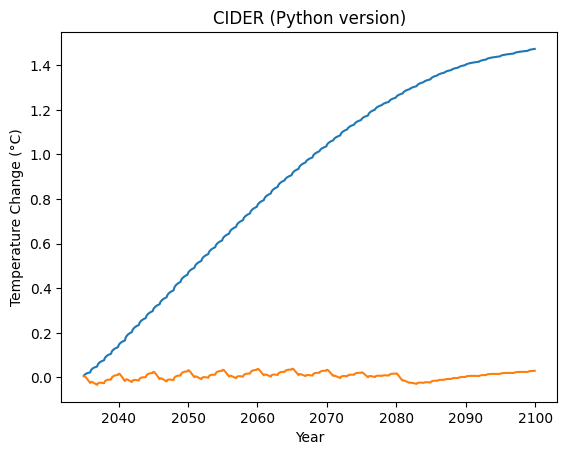

In [43]:

years = np.linspace(2035,2034+(injection_all.shape[0]/12) +(11/12),injection_all.shape[0])

# plotting the points 
plt.plot(years, SSP245_T)
plt.plot(years, SAI_response)

# naming the x axis
plt.xlabel('Year')
# naming the y axis
plt.ylabel('Temperature Change (°C)')

# giving a title to my graph
plt.title('CIDER (Python version)')

# function to show the plot
plt.show()